In [1]:
!pip install umap-learn

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import umap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='poster')

In [24]:
data = pd.read_csv("../data/Train_call.txt", sep='\t')
y = pd.read_csv("../data/Train_clinical.txt", sep='\t')

data.drop(['Chromosome','Start','End','Nclone'], axis=1, inplace=True)
y.drop(['Sample'], axis=1, inplace=True)

classes = np.squeeze(y).astype('category').cat.categories

Supervised UMAP

In [27]:
x_train, x_test, y_train, y_test = \
    train_test_split(data.T, np.squeeze(y).astype('category').cat.codes,
                     test_size = 0.3, random_state=4)

In [81]:
mapper = umap.UMAP(n_neighbors=10, metric='correlation').fit(x_train, y=y_train)

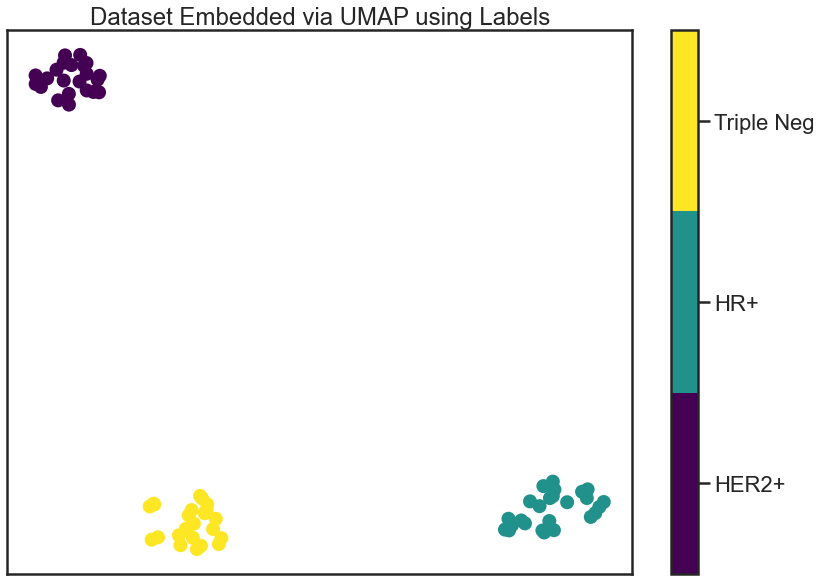

In [100]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, c=y_train, cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('Train Dataset Embedded via UMAP using Labels');

In [101]:
test_embedding = mapper.transform(x_test)

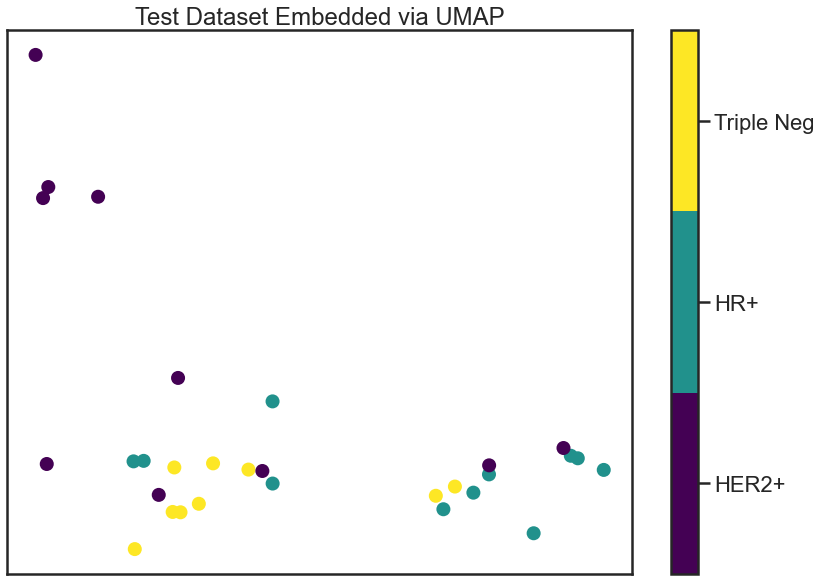

In [103]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, c=np.array(y_test), cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('Test Dataset Embedded via UMAP');

Unsupervised UMAP

In [ ]:
mapper_full = umap.UMAP(metric='braycurtis').fit(data.T)

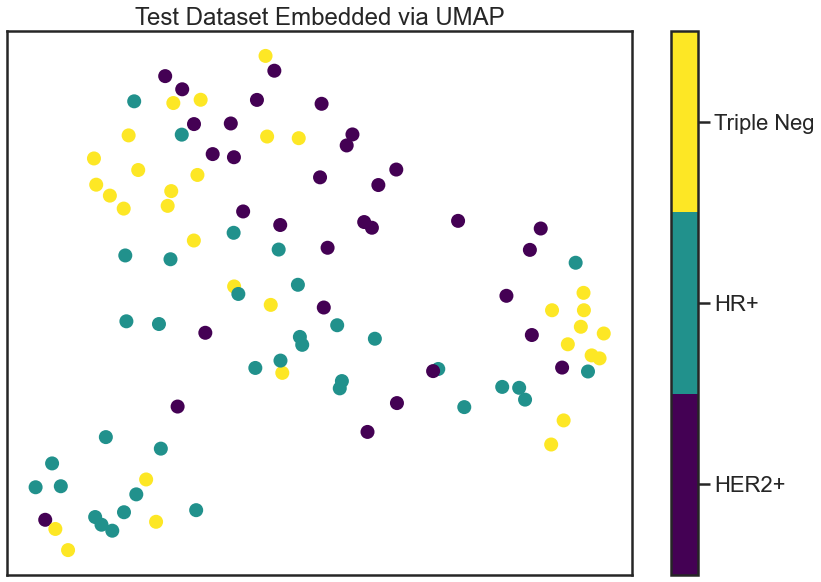

In [105]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper_full.embedding_.T,
            c=np.squeeze(y).astype('category').cat.codes, cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('Test Dataset Embedded via UMAP');

Semisupervised UMAP

In [107]:
y_masked = np.squeeze(y).astype('category').cat.codes.copy()
y_masked[y_test.index]=-1

In [124]:
fitter = umap.UMAP(metric='canberra').fit(data.T, y=y_masked)
embedding = fitter.embedding_

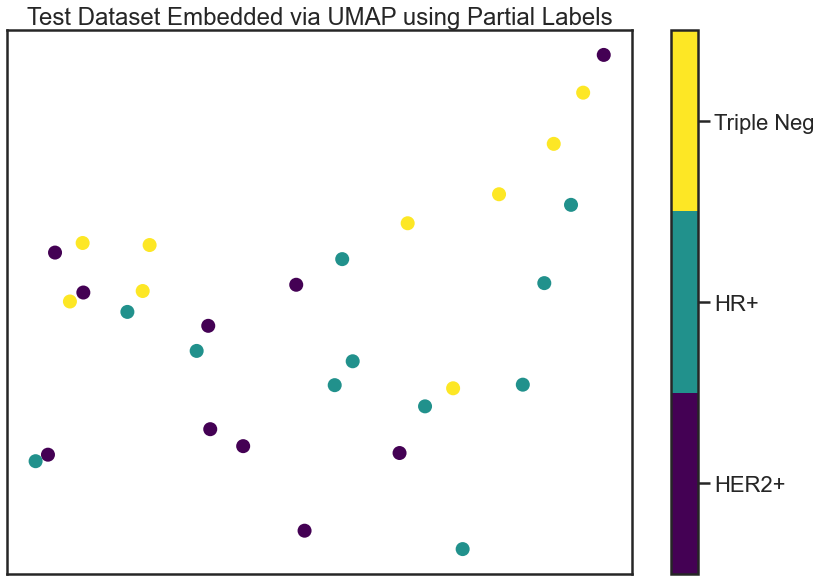

In [125]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T[:,y_test.index],
            c=np.squeeze(y).astype('category').cat.codes[y_test.index], cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('Test Dataset Embedded via UMAP using Partial Labels');

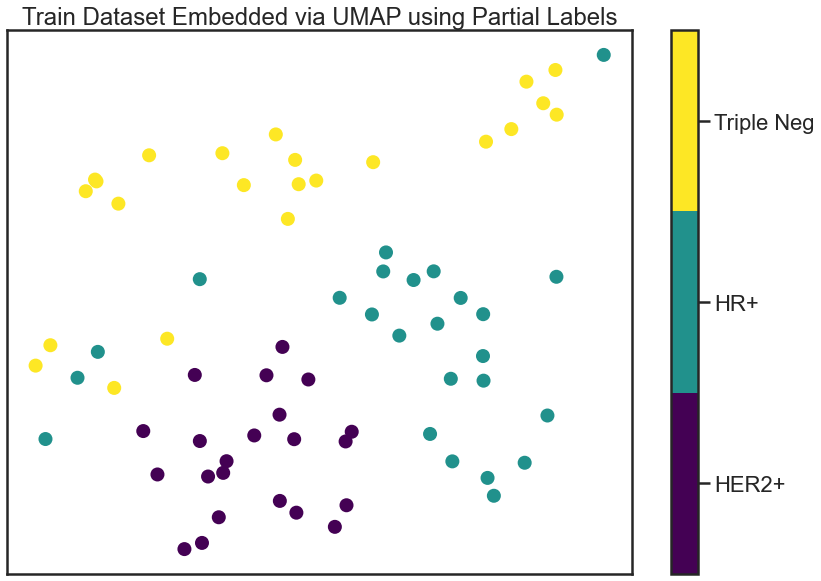

In [126]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T[:,y_train.index],
            c=np.squeeze(y).astype('category').cat.codes[y_train.index], cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('Train Dataset Embedded via UMAP using Partial Labels');

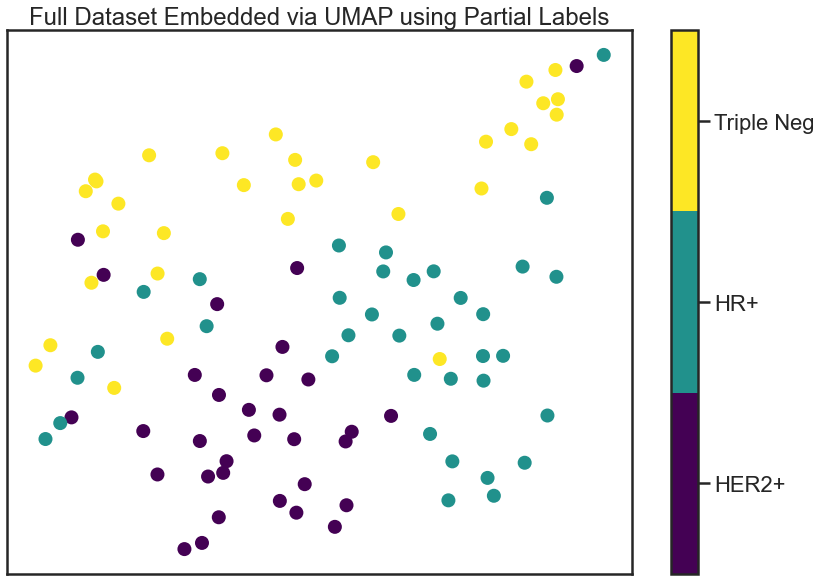

In [127]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T,
            c=np.squeeze(y).astype('category').cat.codes, cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('Full Dataset Embedded via UMAP using Partial Labels');